(ch:probability)=
# 확률분포

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [11]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [12]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [13]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [14]:
pd.set_option('display.precision', 6)

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/statsRev/tree/master/data)를 지정한다.

In [15]:
data_url = 'https://raw.githubusercontent.com/codingalzi/statsRev/refs/heads/master/data/'

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [16]:
import matplotlib.pyplot as plt

**주요 내용**

이 장에서는 확률분포와 확률변수의 개념을 캘리포니아 주택가격 데이터셋을 활용해 설명한다. 먼저 {numref}`%s장 <ch:smapling>`에서 생성한 데이터 객체들중에서 이 장에서 다룰 객체들을 간단히 요약한다.

**모집단과 표본 (요약)**

- 모집단: 캘리포니아 주택가격 데이터셋.
    아래 코드는 캘리포니아 주택가격 데이터셋에서 주택가격이 50만을 초과하는 경우는 삭제하고
    인덱스를 초기화한 후 가구소득 특성만을 남긴다.
    또한 인덱스의 이름을 `district`로 지정한다.

In [17]:
housing = pd.read_csv(data_url+"california_housing_mini.csv")

# 주택가격이 50만1달러 이상인 구역 삭제
house_value_max = housing['median_house_value'].max() # 500,001
mask = housing['median_house_value'] >= house_value_max
housing = housing[~mask]

# 인덱스 초기화
housing = housing.reset_index(drop=True)

# 인덱스 이름 지정
housing.index.name = 'district'

In [18]:
housing

,median_income,median_house_value
district,,
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
19670,1.5603,78100.0
19671,2.5568,77100.0
19672,1.7000,92300.0


- 가구소득 범주 특성 추가

In [19]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing

,median_income,median_house_value,income_cat
district,,,
0,8.3252,452600.0,5
1,8.3014,358500.0,5
2,7.2574,352100.0,5
3,5.6431,341300.0,4
4,3.8462,342200.0,3
...,...,...,...
19670,1.5603,78100.0,2
19671,2.5568,77100.0,2
19672,1.7000,92300.0,2


- 가구소득 범주별 그룹화: 그룹별 표본 크기 확인

In [20]:
stratification = housing.groupby('income_cat', observed=True, group_keys=True)
stratified_count = stratification.count()
stratified_count

,median_income,median_house_value
income_cat,,
1,814,814
2,6552,6552
3,7103,7103
4,3502,3502
5,1704,1704


- 모집단의 가구소득 범주별 상대도수

In [21]:
stratified_ratio = stratified_count/(housing.shape)[0]
stratified_ratio

,median_income,median_house_value
income_cat,,
1,0.041372,0.041372
2,0.333011,0.333011
3,0.361017,0.361017
4,0.177992,0.177992
5,0.086607,0.086607


- 무작위 추출된 표본: 모집단의 10% 무작위 추출

In [22]:
random_sampling = housing.sample(frac=0.1, random_state=42)
random_sampling

,median_income,median_house_value,income_cat
district,,,
14447,1.8357,104200.0,2
13921,4.2109,171200.0,3
12981,4.0481,97300.0,3
2579,3.5380,102700.0,3
12162,2.2000,116500.0,2
...,...,...,...
19377,6.6246,284200.0,5
485,2.9405,289500.0,2
5018,1.6027,97300.0,2


- 무작위 추출된 표본의 가구소득 범주별 그룹 크기

In [23]:
random_sampling_count = random_sampling.groupby('income_cat', observed=False).count()
random_sampling_count

,median_income,median_house_value
income_cat,,
1,87,87
2,644,644
3,702,702
4,347,347
5,188,188


- 무작위 추출된 표본의 가구소득 범주별 상대도수

In [24]:
random_total = random_sampling_count.sum()
random_sampling_ratio = random_sampling_count / random_total
random_sampling_ratio

,median_income,median_house_value
income_cat,,
1,0.044207,0.044207
2,0.327236,0.327236
3,0.356707,0.356707
4,0.176321,0.176321
5,0.095528,0.095528


- 가구소득 범주별 상대도수 비교

In [25]:
proportions = pd.concat([stratified_ratio.iloc[:, [1]],
                         random_sampling_ratio.iloc[:, [1]]],
                        axis=1)

proportions.columns = ['전체', '무작위 추출']
proportions.index.name = '가구소득 범주'
proportions

,전체,무작위 추출
가구소득 범주,,
1,0.041372,0.044207
2,0.333011,0.327236
3,0.361017,0.356707
4,0.177992,0.176321
5,0.086607,0.095528


## 확률분포

모집단에서 임의로 표본을 선택하는 무작위 추출의 결과는 일반적으로 매번 다르고 예측할 수 없다.
하지만 무작위 추출을 실행할 때 나올 결과들의 확률을 계산할 수 있는 경우가 있다.

예를 들어, 주사위를 던질 때 나오는 값은 1부터 6까지의 정수 중에서 무작위로 하나의 수를 선택하는 무작위 추출이다.
주사위를 던지면 매번 어떤 값이 나올지 예상할 수는 없지만, 1부터 6까지의 값들이 균등하게 1/6의 확률로 나온다는 사실은 알고 있다.

이처럼, 무작위 실험의 결과는 예측 불가능하지만, 각 결과가 나타날 확률이 알려져 있을 때, 이 결과를 수치화한 변수를 **확률변수**<font size='2'>random variable</font>, 그 확률들을 표로 나타낸 것을 **확률분포**<font size='2'>probability distribution</font>라 한다.

확률변수 $X$가 특정한 값 $x_k$를 취할 확률이 $p_k$이면, 다음과 같이 표기한다.

$$
P(X=x_k) = p_k
$$

예를 들어, 주사위를 던졌을 때 나오는 값을 확률변수 $X$라 하면, $X$가
1부터 6까지의 정수를 가질 확률은 모두 1/6로 동일하고, 다음과 같이 표현한다.

$$
P(X=1) = P(X=2) = \cdots = P(X=6) = \frac1 6
$$

 따라서 확률변수 $X$의 확률분포는 다음과 같고, '확률변수 $X$는 이 확률분포를 따른다'고 말한다.

| X | 1 | 2 | 3 | 4 | 5 | 6|
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |

### 무작위 추출의 확률분포

이제 `housing` 데이터셋의 예를 통해서, 모집단의  확률분포와 무작위 추출의 관계를 이해해보자.

모집단인 `housing` 데이터셋에서 임의로 선택한 구역의 가구소득 범주를 $X$라 하면, $X$는 아래 확률분포를 따르는 확률변수가 된다.

| X | 1 | 2 | 3 | 4 | 5 |
| :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 0.041372 | 0.333011 | 0.361017 | 0.177992 | 0.086607 |

이유는 앞서 계산한 가구소득 범주별 상대도수가 아래 표의 "전체" 열과 같기 때문이다.

In [26]:
proportions

,전체,무작위 추출
가구소득 범주,,
1,0.041372,0.044207
2,0.333011,0.327236
3,0.361017,0.356707
4,0.177992,0.176321
5,0.086607,0.095528


위 표의 "무작위 추출" 특성에서 볼 수 있듯이, 모집단인 19,674개 구역의 10%인 1,968개 구역을 무작위 추출하면 가구소득 범주별 상대도수가 모집단의 상대도수와 유사함을 알 수 있다. 즉, 표본의 크기가 충분히 크면, 무작위 추출된 표본의 분포는 모집단의 확률분포에 점점 가까워진다. 이러한 성질은 상대도수 히스토그램을 통해서도 확인할 수 있다.

**`plt.hist()` 함수 활용**

아래 코드는 무작위 추출 표본의 가구소득 범주별 상대도수 히스토그램을
모집단의 가구소득 범주별 상대도수 히스토그램과 비교한다.
`plt.hist()` 함수를 호출할 때 `density=True`를 지정하면 도수 대신에 상대도수를 막대그래프 형식으로 그려준다. `hist()` 함수의 자세한 사용법은 이미 [7장](https://codingalzi.github.io/statsRev/oneD_visualization.html)에서 설명했으므로, 여기서는 생략한다.

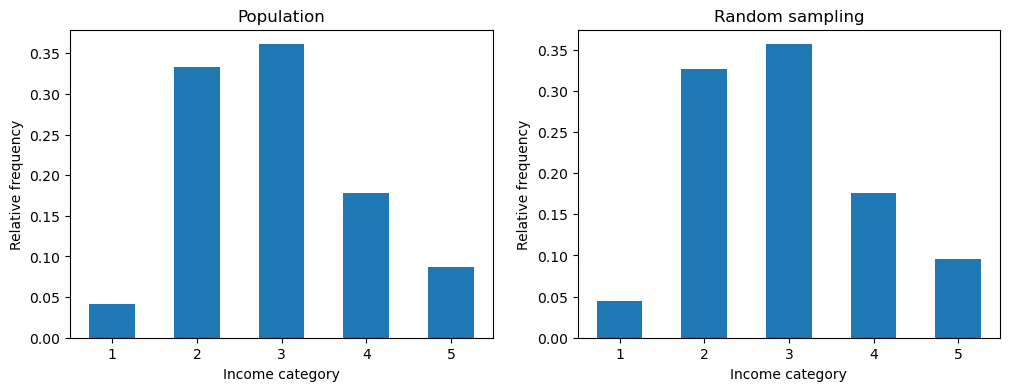

In [27]:
income_cat = housing['income_cat']
income_cat_random = random_sampling['income_cat']

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.hist(income_cat, bins=5, range=(1, 6), density=True, rwidth=0.54)
ax1.set_xticks(np.linspace(1.5, 5.5, 5))
ax1.set_xticklabels(np.arange(1, 6))
ax1.set_xlabel('Income category')
ax1.set_ylabel('Relative frequency')
ax1.set_title('Population')

ax2.hist(income_cat_random, bins=5, range=(1, 6), density=True, rwidth=0.54)
ax2.set_xticks(np.linspace(1.5, 5.5, 5))
ax2.set_xticklabels(np.arange(1, 6))
ax2.set_xlabel('Income category')
ax2.set_ylabel('Relative frequency')
ax2.set_title('Random sampling')

plt.show()

## 균등분포

확률변수가 가질 수 있는 모든 값에 대해 동일한 확률을 갖는 확률분포를
**균등분포**<font size='2'>uniform distribution</font>라 부른다. 앞에서 다룬 주사위를 던졌을 때 나오는 값의 확률분포가 균등분포의 예이고, 여기서는 `housing`의 index 집합에서 무작위 추출을 할 때의 예를 살펴본다.  

다음 코드는 모집단인 `housing` 데이터프레임에서 무작위 추출로 10%의 표본을 생성할 때 사용한 것이다.

```python
housing.sample(frac=0.1, random_state=42)
```

여기에 사용된 `sample()` 메서드는 `housing`의 인덱스 집합, 즉 0부터 19,674까지의 정수 집합을 모집단으로 해서 무작위 추출로 크기 1,968의 표본을 생성한다.

In [28]:
housing_index = housing.index
housing_index

RangeIndex(start=0, stop=19675, step=1, name='district')

아래 코드는 실제로 `sample()` 메서드에 의해 추출된 인덱스들이 0부터 19,674까지의 인덱스 영역 전체에 골고루 분포됨을 시각적으로 보여준다.
`random_sampling` 표본의 크기가 1,968이고, 전체 인덱스 범위는 50개 구간으로 나뉘었으므로, 각 구간당 평균적으로 1968/50개의 표본을 포함해야 하며 빨간 점선이 이를 가리킨다.

여기서 사용된 `matplotlib` 라이브러리의 `hlines()` 함수는 그래프에 수평선을 그리는 함수로서, 사용법은 `plt.hlines(y, xmin, xmax, 기타 키워드 인자)`이다.

- `y`: 수평선을 그릴 y좌표의 단일값 또는 배열.
- `xmin`: 수평선이 시작될 x 좌표의 단일값 또는 배열.
- `xmax`: 수평선이 끝날 x 좌표의 단일값 또는 배열.
- 기타 키워드 인자: `colors`, `linestyles`, `linewidth`, `label` 등.

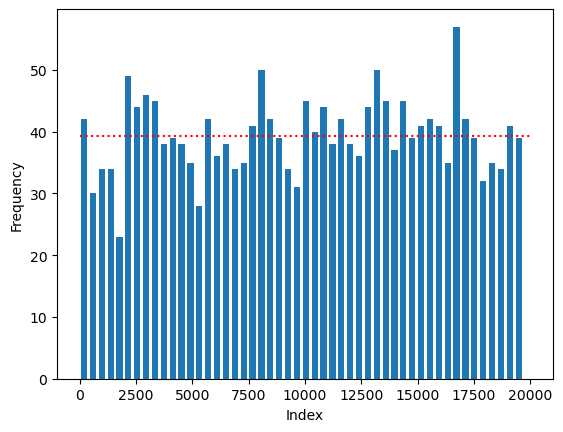

In [29]:
freq, edges, _ = plt.hist(random_sampling.index, bins=50, range=(0, 19674), rwidth=0.7)
plt.hlines(1968/50, 0, 20000, color='red', linestyles=':')

plt.xlabel('Index')
plt.ylabel('Frequency')
plt.show()

실제로 각 구간별 도수와 평균값은 다음과 같다.

- 구간별 도수

In [30]:
freq

array([42., 30., 34., 34., 23., 49., 44., 46., 45., 38., 39., 38., 35.,
       28., 42., 36., 38., 34., 35., 41., 50., 42., 39., 34., 31., 45.,
       40., 44., 38., 42., 38., 36., 44., 50., 45., 37., 45., 39., 41.,
       42., 41., 35., 57., 42., 39., 32., 35., 34., 41., 39.])

- 구간별 도수 평균값

In [31]:
np.mean(freq)

39.360000

모집단 `housing_index`로부터 `sample()` 메서드에 의해 무작위 추출된 인덱스가 위 히스토그램에 표현한 50개 구간의 어디에 속하는지, 그 구간의 번호를 확률변수 $Y$라 하자.
그러면 $Y$가 1부터 50까지의 구간 번호 $k$가 될 확률은 거의 동일하게 $50/1968 \simeq 0.02$ 이어야 한다.
즉, 확률변수 $Y$는 다음과 같은 균등분포를 따른다.
$$
P(Y = k) = 50/1968 \simeq 0.02 , \quad k=1,\cdots, 50
$$


이를 실제 데이터로 확인할 수 있다.

- 구간별 상대도수

In [32]:
freq/1968

array([0.021341, 0.015244, 0.017276, 0.017276, 0.011687, 0.024898,
       0.022358, 0.023374, 0.022866, 0.019309, 0.019817, 0.019309,
       0.017785, 0.014228, 0.021341, 0.018293, 0.019309, 0.017276,
       0.017785, 0.020833, 0.025407, 0.021341, 0.019817, 0.017276,
       0.015752, 0.022866, 0.020325, 0.022358, 0.019309, 0.021341,
       0.019309, 0.018293, 0.022358, 0.025407, 0.022866, 0.018801,
       0.022866, 0.019817, 0.020833, 0.021341, 0.020833, 0.017785,
       0.028963, 0.021341, 0.019817, 0.01626 , 0.017785, 0.017276,
       0.020833, 0.019817])

- 구간별 상대도수 평균값

In [33]:
np.mean(freq/1968)

0.020000

### 넘파이의 `random.choice()` 함수

데이터프레임의 `sample()` 메서드는 앞서 설명한대로 모집단 전체 인덱스를 기준으로 균등하게 표본을 추출한다. 넘파이의 `random.choice()` 함수를 이용해도 동일한 결과를 얻을 수 있는데, 이 함수는 균등분포 외의 임의의 확률분포에서도 무작위 표본추출에 활용될 수 있다.

아래 코드는 0부터 19,674까지의 정수 중에서 무작위로 1,968개의 정수를 중복 없이 추출한다.
무작위 추출의 시드를 `sample()` 메서드에서의 `random_state=42`와 동일하게 42로 지정해야 함에 유의한다.


In [34]:
np.random.seed(42)
random_choice = np.random.choice(range(0, 19675), 1968, replace=False)

In [35]:
random_choice

array([14447, 13921, 12981, ...,  5018,   967,  3975])

선택된 정수를 크기순으로 정렬해 처음 10개의 값을 확인하면 다음과 같다.

In [36]:
random_choice.sort()
random_choice[:10]

array([  3,   6,  17,  35,  42,  57,  59, 103, 115, 127])

데이터프레임 `random_sampling`의 인덱스도 크기순으로 정렬해 확인해보자.

In [37]:
random_index = np.array(random_sampling.index)
random_index.sort()
random_index[:10]

array([  3,   6,  17,  35,  42,  57,  59, 103, 115, 127])

처음 10개만이 아니라 두 표본 전체를 확인해도 모든 항목이 동일하다.
넘파이 어레이의 `all()` 메서드는 모든 항목이 참일 때 `True`를 반환한다.

In [38]:
(random_choice == random_index).all()

True

### 특정 확률분포를 따르는 무작위 추출

앞서 보았듯이 `np.random.choice()` 함수는 균등분포를 따른다. 1부터 5까지의 정수에 대해 실행하면 각각의 정수가 1/5의 확률로 선택됨을 간단한 모의실험으로 확인해보자.

아래 코드는 `np.random.choice()` 함수를 이용하여 1부터 5까지의 정수를 무작위로 1만 개 선택한 후, 선택된 표본을 대상으로 도수분포표를 출력한다.

In [39]:
np.random.seed(42)

random_trial = 10000
sample = np.random.choice(range(1, 6), random_trial)
freq, _ = np.histogram(sample, bins=5, range=(1, 6))
freq

array([2047, 2016, 1943, 1975, 2019])

1부터 5까지의 각 정수별 도수와 상대도수를 데이터프레임으로 확인하면
각 정수가 모두 약 20%씩 선택되었음이 확인된다.

In [40]:
freq10000 = pd.DataFrame({'도수': freq, '상대도수': freq/random_trial},
                         index=range(1, 6))

freq10000

,도수,상대도수
1,2047,0.2047
2,2016,0.2016
3,1943,0.1943
4,1975,0.1975
5,2019,0.2019


**`p = 확률분포` 키워드 인자**

앞서 말한대로 `np.random.choice()` 함수가 특정 확률분포를 따르도록 할 수 있다.
예를 들어, 1부터 5까지의 정수를 무작위 추출하되,
캘리포니아 주택데이터의 가구소득 범주의 확률분포를 따르도록 할 수 있다.

먼저 가구소득 범주를 가르키는 확률변수 $X$의 확률분포를 1차원 어레이 `prob_X`로 지정한다.

In [41]:
prob_X = proportions['전체'].values
prob_X

array([0.041372, 0.333011, 0.361017, 0.177992, 0.086607])

이제 앞의 실험에서 사용한 `np.random.choice()` 함수 호출에 `p = prob_X` 인자를 추가하면, 1부터 5까지의 정수 1만개를 추출할 때 확률변수 $X$의 확률분포를 따르게 된다. 도수분포표의 상대도수를 확인하면 `prob_X`와 매우 유사함이 확인된다.

In [42]:
np.random.seed(42)

random_trial = 10000
sample = np.random.choice(range(1, 6), random_trial, p = prob_X)
freq, _ = np.histogram(sample, bins=5, range=(1, 6))
income_cat_freq10000 = pd.DataFrame({'도수': freq, '상대도수': freq/random_trial},
                                    index=range(1, 6))
income_cat_freq10000

,도수,상대도수
1,416,0.0416
2,3379,0.3379
3,3655,0.3655
4,1712,0.1712
5,838,0.0838


아래 코드는 위 데이터프레임의 상대도수를 `plot()` 함수를 통해 히스토그램으로 그리고, prob_X의 확률들도 빨간 선으로 표시한다.
- `plot()` 함수의 `rot=0` 인자는 x축 레이블을 수평(0도)으로 표시하기 위함이고, `kind='bar'`는 막대 그래프로 그리도록 설정한다.
- `plt.hlines()` 함수가 그릴 수평선의 y좌표가 `prob_X` 배열이므로, x좌표의 시작점과 끝점을 나타내는 인수들도 이와 동일한 크기 5의 배열로 주어져야 한다. `plot.bar()` 함수가 그리는 각 막대의 중심이 0, 1, 2, 3, 4 등으로 정해지므로, x좌표의 시작점과 끝점은 각각 -0.3과 0.3으로부터 1씩 증가시킨
크기 5의 배열로 지정했다.

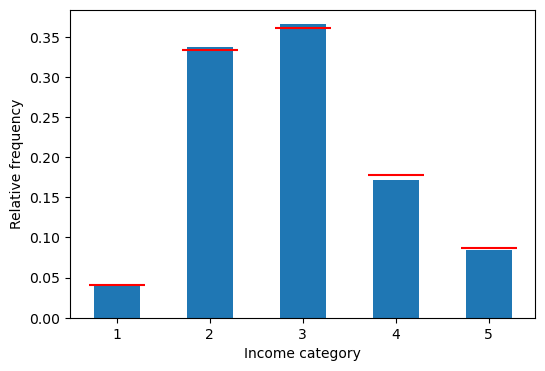

In [43]:
fig = plt.figure(figsize=(6,4 ))
hx = fig.add_subplot(1,1,1)

_ = income_cat_freq10000['상대도수'].plot(ax=hx, rot=0, kind='bar') # 막대그래프
hx.hlines(prob_X, np.arange(-0.3, 4, 1), np.arange(0.3, 4.5, 1), colors='red')
hx.set_xlabel('Income category')
hx.set_ylabel('Relative frequency')
plt.show()

In [44]:
np.arange(-0.3, 4, 1)

array([-0.3,  0.7,  1.7,  2.7,  3.7])

동일한 그림을 추출된 표본 데이터 자체를 이용하여 그릴 수도 있다. `plt.hist()` 함수의 `density=True`는 도수가 아닌 상대도수의 히스토그램을 그려준다. 단,
`plt.hist()` 함수가 그리는 각 막대의 중심이 1.5, 2.5, 3.5, 4.5, 5.5 등으로 정해지므로, x좌표의 시작점과 끝점은 각각 1.2와 1.8로부터 1씩 증가시킨 크기 5의 배열로 지정한다.

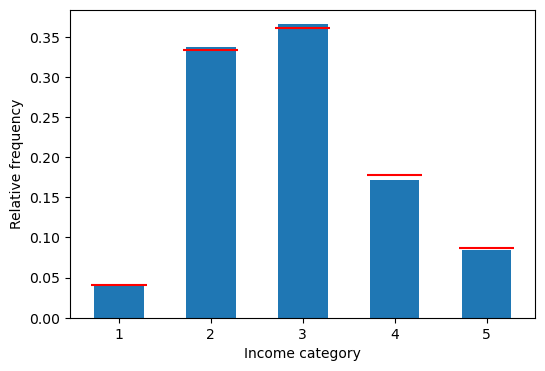

In [45]:
fig = plt.figure(figsize=(6,4 ))
hx = fig.add_subplot(1,1,1)

hx.hist(sample, bins=5, range=(1, 6), density=True, rwidth=0.54)
hx.hlines(prob_X, np.arange(1.2, 6, 1), np.arange(1.8, 6.3, 1), colors='red')

hx.set_xticks(np.linspace(1.5, 5.5, 5))
hx.set_xticklabels(np.arange(1, 6))
hx.set_xlabel('Income category')
hx.set_ylabel('Relative frequency')
plt.show()

## 연습문제

참고: [(연습) 확률분포](https://colab.research.google.com/github/codingalzi/statsRev/blob/master/practices/practice-probability.ipynb)